In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

SSE(sum of squares for error)

$E = {1 \over 2}\sum_k(y_k - t_k)^2$

In [3]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [4]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
sum_squares_error(y, t)

0.09750000000000003

In [5]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
sum_squares_error(y, t)

0.5975

Cross entropy error

$E = -\sum_kt_k\log y_k$

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
cross_entropy_error(y, t)

0.510825457099338

In [8]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
cross_entropy_error(y, t)

2.302584092994546

Mini Batch

In [9]:
sys.path.append(os.pardir)

from dataset.mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

Differentiation

${df(x)\over dx}=\lim_{h\to0}{f(x+h)-f(x)\over h}$

In [13]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

In [14]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

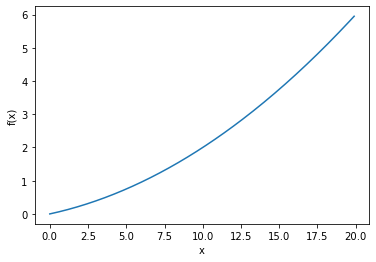

In [15]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [16]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [17]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y

0.1999999999990898
0.2999999999986347


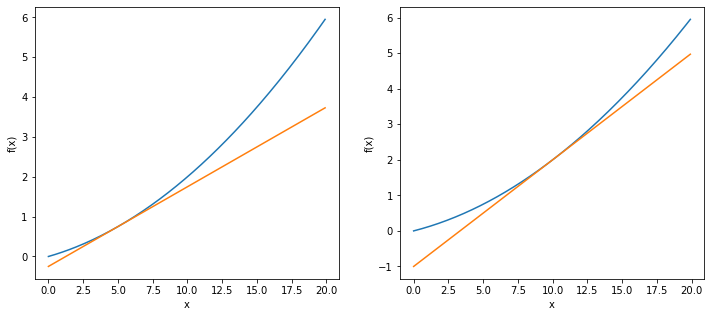

In [18]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(x, y)
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
tf = tangent_line(function_1, 5)
y2 = tf(x)
ax1.plot(x, y2)


ax2.plot(x, y)
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
tf = tangent_line(function_1, 10)
y2 = tf(x)
ax2.plot(x, y2)

plt.show()

$f(x_0, x_1) = x_0^2 + x_1^2$

In [19]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [20]:
def function_2(x):
    return np.sum(x ** 2)

$x_0=3, x_1=4$ 일 때 $x_0$에 대한 편미분 ${\partial f \over \partial x_0}$을 구하라

In [21]:
numerical_diff(lambda x0: x0 ** 2 + 4 ** 2, 3.)

6.00000000000378

$x_0=3, x_1=4$일 때, $x_1$에 대한 편미분 ${\partial f \over \partial x_1}$을 구하라

In [22]:
numerical_diff(lambda x1: 3 ** 2 + x1 ** 2, 4)

7.999999999999119

Gradient

$({\partial f \over \partial x_0}, {\partial f \over \partial x_1})$

In [23]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

In [24]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


Gradient descent  
$x_0 = x_0-\eta{\partial f \over \partial x_0}$  
$x_1 = x_1-\eta{\partial f \over \partial x_1}$

In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

경사하강법으로 $f(x_0, x_1) = x_0^2 + x_1^2$의 최솟값을 구하라

In [26]:
init_x = np.array([-3.0, 4.0])

In [27]:
gradient_descent(lambda x: x[0] ** 2 + x[1] ** 2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(lambda x: x[0] ** 2 + x[1] ** 2, init_x=init_x, lr=10., step_num=100))
init_x = np.array([-3.0, 4.0])
print(gradient_descent(lambda x: x[0] ** 2 + x[1] ** 2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [29]:
class Net:
    
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [30]:
net = Net()
print(net.W)

[[-0.83046572 -0.67532704 -1.28823585]
 [ 1.55063554  0.82672597  0.78525374]]


In [31]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.89729256  0.33885714 -0.06621314]


In [32]:
np.argmax(p)

0

In [33]:
t = np.array([0, 0, 1])
net.loss(x, t)
net.loss(x, t)

1.2281377649045717

In [34]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        it.iternext()
    return grad        

In [35]:
dW = numerical_gradient(lambda w: net.loss(x, t), net.W)
print(dW)

[[ 0.30711634 -0.42429747  0.11718114]
 [ 0.4606745  -0.63644621  0.17577171]]
